In [5]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score, f1_score

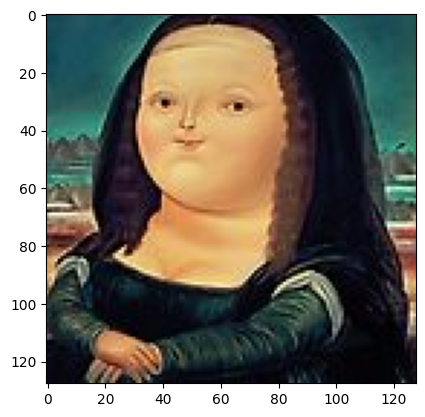

In [6]:
img = cv2.cvtColor(cv2.imread("../data/MonaLisaBotero.jpg"), cv2.COLOR_BGR2RGB)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img)
plt.show()

In [7]:
def objective_function(vec,out, img):
    # blank mask for drawing the shapes
    shapes = np.zeros_like(img, np.uint8)
    t = out.copy()
    # draw circle
    vec[2] = np.abs(vec[2])
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    t[mask] = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)[mask]

    # plt.imshow(cv2.cvtColor(shapes, cv2.COLOR_BGR2RGB))
    # plt.show()

    #bt = t[: ,: ,0]
    #gt = t[: ,: ,1]
    #rt = t[: ,: ,2]
    #bImg = img[:,:,0]
    #gImg = img[:,:,1]
    #rImg= img[:,:,2]
    # print("(",vec[3],vec[4],vec[5],")")
    return np.sum(np.abs(np.subtract(img,t))) 

    #b  = f1_score(bImg, bt, average='micro')
    #g =  f1_score(gImg, gt, average='micro')
    #r =  f1_score(rImg, rt, average='micro')
    #return np.average((r, g, b)) 
    
out = np.zeros_like(img)
objective_function([100,90, 8, 0,0,255,0.2], out, img) #X,Y,r,R,G,B,alpha

3863900

In [8]:
def draw_circle(vec, out, print = False):
    shapes = np.zeros_like(out, np.uint8)

    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    out[mask] = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)[mask]

    if print:
        plt.imshow(out)
        plt.show()

In [9]:
w,h,c = img.shape

bounds = [
    [0,w],# x
    [0,h], # y
    [5, (w + h)//4], # radius
    [0,255], # R
    [0,255], # G
    [0,255], # B
    [0.3,1], # alpha
]

# Our Differential Evolution

In [10]:
from differential_evolution import differential_evolution

0 {'P': array([5.61546743e+01, 4.61393616e+01, 3.30559446e+01, 1.08187646e+03,
       1.89679618e+02, 3.29613689e+01, 7.19653442e-01]), 'nIt': 100, 'fun': 3137394, 'nFev': 10100}


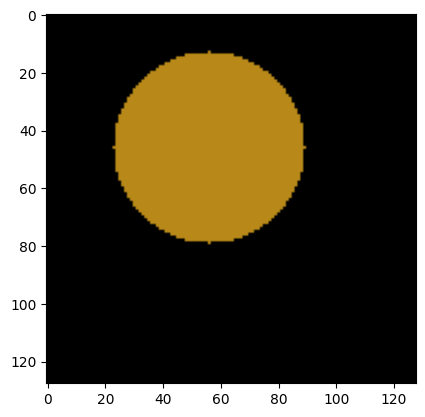

60 {'P': array([  59.88114345,   17.28541084,   16.92881575,  -36.33547174,
       -163.20935021,  119.88674963,    0.28421264]), 'nIt': 100, 'fun': 2069740, 'nFev': 10100}


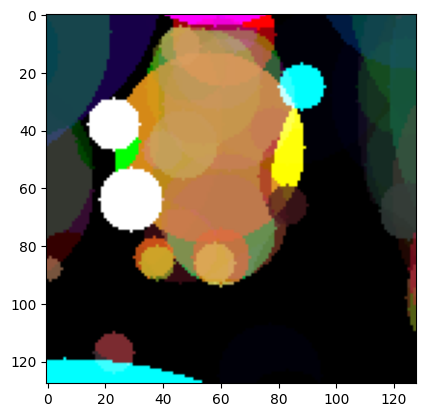

120 {'P': array([  14.1856576 ,  248.68488855,  131.84847869, -214.64813069,
       -313.4372483 ,   70.99513939,   -0.41850793]), 'nIt': 100, 'fun': 1926474, 'nFev': 10100}


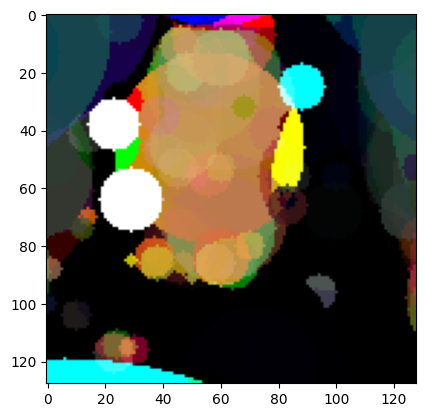

180 {'P': array([ 4.38832281e+01,  7.62989395e-01,  7.11308384e+00,  2.34748665e+02,
        5.47234928e+01,  9.20166530e+02, -2.84483352e+00]), 'nIt': 100, 'fun': 1846402, 'nFev': 10100}


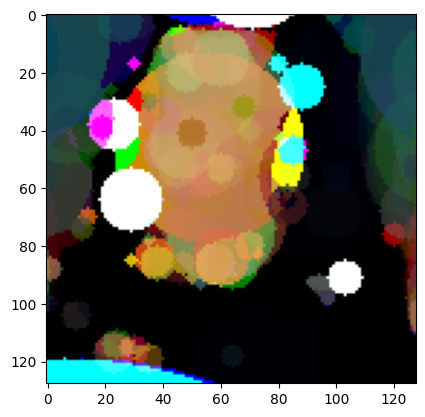

240 {'P': array([ 97.36255331,  25.92727071,  12.57662035, 539.5755424 ,
       -11.48909676,  -7.33673829,   1.05925913]), 'nIt': 100, 'fun': 1786869, 'nFev': 10100}


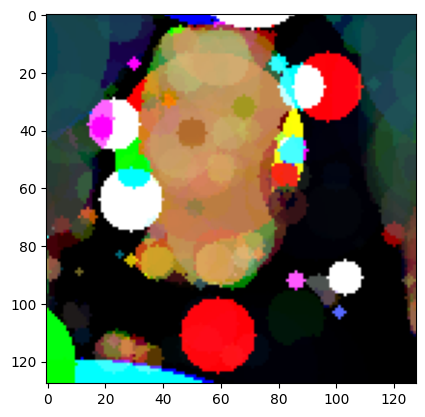

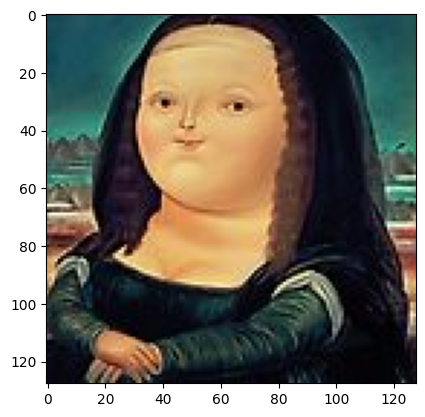

In [11]:
nIter, out = 300, np.zeros_like(img)
for i in range(nIter):
    r = differential_evolution(objective_function, bounds, args = (out, img), popSize=100, cR = 0.5, nGen = 100)
    if i % (nIter // 5):
        draw_circle(r["P"], out)
    else:
        print(i, r)
        draw_circle(r["P"], out, True)
plt.imshow(img)
plt.imshow(out)

# Scipy Differential Evolution

In [12]:
from scipy.optimize import differential_evolution

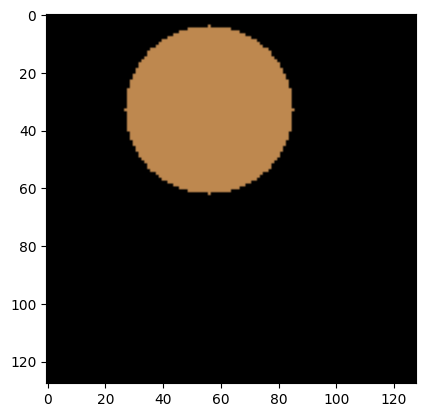

0      fun: 3026802.0
 message: 'Optimization terminated successfully.'
    nfev: 19608
     nit: 27
 success: True
       x: array([ 56.71361148,  33.19346217,  29.19663069, 223.63838795,
       160.56716091,  92.54610567,   0.84758079])


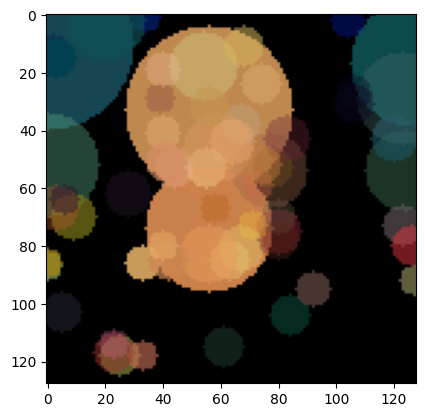

60      fun: 1845989.0
 message: 'Optimization terminated successfully.'
    nfev: 6308
     nit: 8
 success: True
       x: array([ 56.3255764 ,  32.55514891,   7.28933357, 197.45431127,
       148.60934175,  78.71728814,   0.57214752])


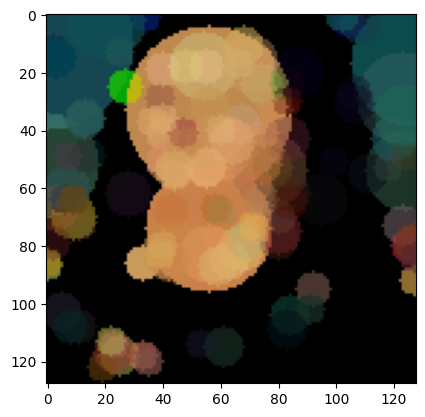

120      fun: 1716080.0
 message: 'Optimization terminated successfully.'
    nfev: 8408
     nit: 11
 success: True
       x: array([124.60726808,  35.58423074,  11.89635153,  25.31150431,
       118.81620984,  83.18114791,   0.30991698])


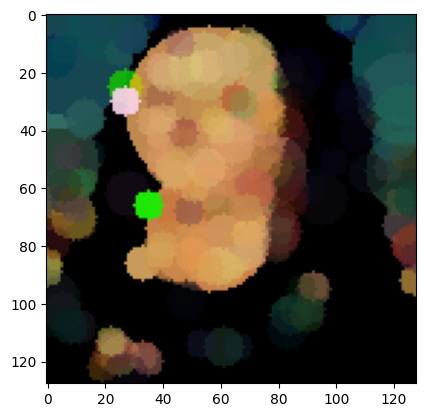

180      fun: 1650820.0
 message: 'Optimization terminated successfully.'
    nfev: 7008
     nit: 9
 success: True
       x: array([ 86.45268106, 102.90974096,   6.70105601,  33.25401069,
        62.66964193,  46.0684319 ,   0.32086595])


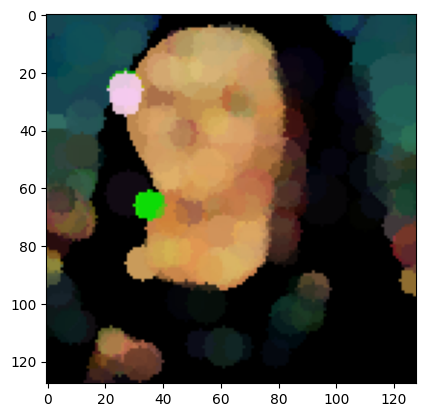

240      fun: 1604528.0
 message: 'Optimization terminated successfully.'
    nfev: 6308
     nit: 8
 success: True
       x: array([ 27.49697641,  26.25845522,   6.28859805, 244.99196284,
       202.02827228, 239.7289898 ,   0.92987082])


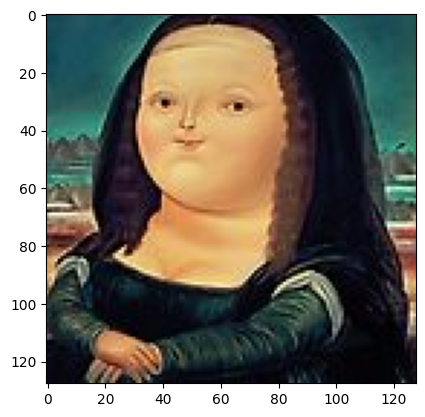

In [13]:
nIter, out = 300, np.zeros_like(img)
for i in range(nIter):
    res = differential_evolution(objective_function, bounds, args=(out,img), popsize= 100)
    # plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    # plt.show()
    if i % (nIter // 5): draw_circle(res.x, out)
    else:
        draw_circle(res.x, out, True)
        print(i, res)
plt.imshow(out)
plt.imshow(img)

# Project

## Recommendation

Work along *scipy*. The idea is to make the project behave as scipy does.

Start with something small and easy. With few details and an image of 200 x 200 approx.

## Individual

The individual is recommended to have:

- **x** - x coordinate value of the circle.

- **y** - y coordinate value of the circle.

- **r** - Radius of the circle, recommended value is (3 or something like that to half the image size).

- **Colors** - RGBA

    - Alpha is optional.

## How it works

This algorithm has to execute itself as many times as circles the image has.

Each execution will add a new circle that minimizes the difference between the image we're building and the target one.